In [ ]:
!pip install --upgrade joblib==1.1.0
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 13.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=b948cb1749dd201dc12cb13516e866ce12cc6b81d0e67ce19bd1a9859abfd537
  Stored in directory: /root/.cache/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


In [ ]:
import mglearn

from sklearn.model_selection import train_test_split 

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns



%config InlineBackend.figure_format = 'retina'

plt.rc('font', family=font_name)  
plt.rcParams['axes.unicode_minus'] = False 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X, y = mglearn.datasets.make_forge() 
X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [ ]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {clf.score(X_tr, y_tr)} / 테스트용 평가지표: {clf.score(X_te, y_te)}')

훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.8571428571428571


In [ ]:
print(f'before: {X.shape}')
enc = OneHotEncoder()
X_enc = enc.fit_transform(X)
print(f'after: {X_enc.shape}')

before: (26, 2)
after: (26, 52)


In [ ]:
X_tr_enc, X_te_enc, y_tr, y_te = train_test_split(X_enc, y, random_state=0)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3).fit(X_tr_enc, y_tr)
print(f'훈련용 평가지표: {clf.score(X_tr_enc, y_tr)} / 테스트용 평가지표: {clf.score(X_te_enc, y_te)}')

훈련용 평가지표: 0.9473684210526315 / 테스트용 평가지표: 0.42857142857142855


# 데이터 로드

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

SEED = 42

In [ ]:
DATA_PATH = "/content/drive/MyDrive/data/titanic"
df = pd.read_csv(DATA_PATH+"/train.csv")

df.columns = [col.lower() for col in df.columns] # 컬럼명 소문자로 변환
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'gender', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [ ]:
y_train = df["survived"] # 정답값
df = df.drop('survived', axis=1) # 정답값 제외
df.shape, y_train.shape
간 내 랜덤 조합을 사용하기 때문에 더 많은 지점을 살펴볼 수 있고, 불필요한 반복 탐색이 줄어 그리드 서치보다 탐색 속도가 빠름

((916, 11), (916,))

In [ ]:
df.age = df.age.fillna(df.age.median())
df.fare = df.fare.fillna(df.fare.median())
df.cabin = df.cabin.fillna("UNK")
df.embarked = df.embarked.fillna(df.embarked.mode()[0])

In [ ]:
cols = ['pclass', 'age', 'sibsp', 'parch','fare']
features = df[cols]

In [ ]:
print(f'before: {df.shape}')
#범주형 one-hot encoding
cols = ["gender", "embarked", "ticket", "cabin"]
enc = OneHotEncoder()
sparse_features = pd.DataFrame(
    enc.fit_transform(df[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
x_train = pd.concat([features,sparse_features], axis=1)
print(f'after: {x_train.shape}')
x_train.head()

before: (916, 11)
after: (916, 860)


,pclass,age,sibsp,parch,fare,gender_female,gender_male,embarked_C,embarked_Q,embarked_S,...,cabin_F,cabin_F E46,cabin_F E57,cabin_F E69,cabin_F G63,cabin_F2,cabin_F33,cabin_G6,cabin_T,cabin_UNK
0,2,28.0,0,0,12.8750,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,28.0,0,0,7.7500,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,52.0,1,1,93.5000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,27.0,0,0,7.7958,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,44.0,1,0,26.0000,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# base model

In [ ]:
model = LGBMClassifier(random_state=SEED)
cv = KFold(n_splits=5,shuffle=True,random_state=SEED) # 학습을 다섯 번 시킴

scores = cross_val_score(model,x_train,y_train,cv = cv , scoring="roc_auc",n_jobs=-1) #교차 분석
base_score = scores.mean() #다섯 번 구한 뒤 평균
base_score

0.8933173900916701

# PCA(주성분 분석)

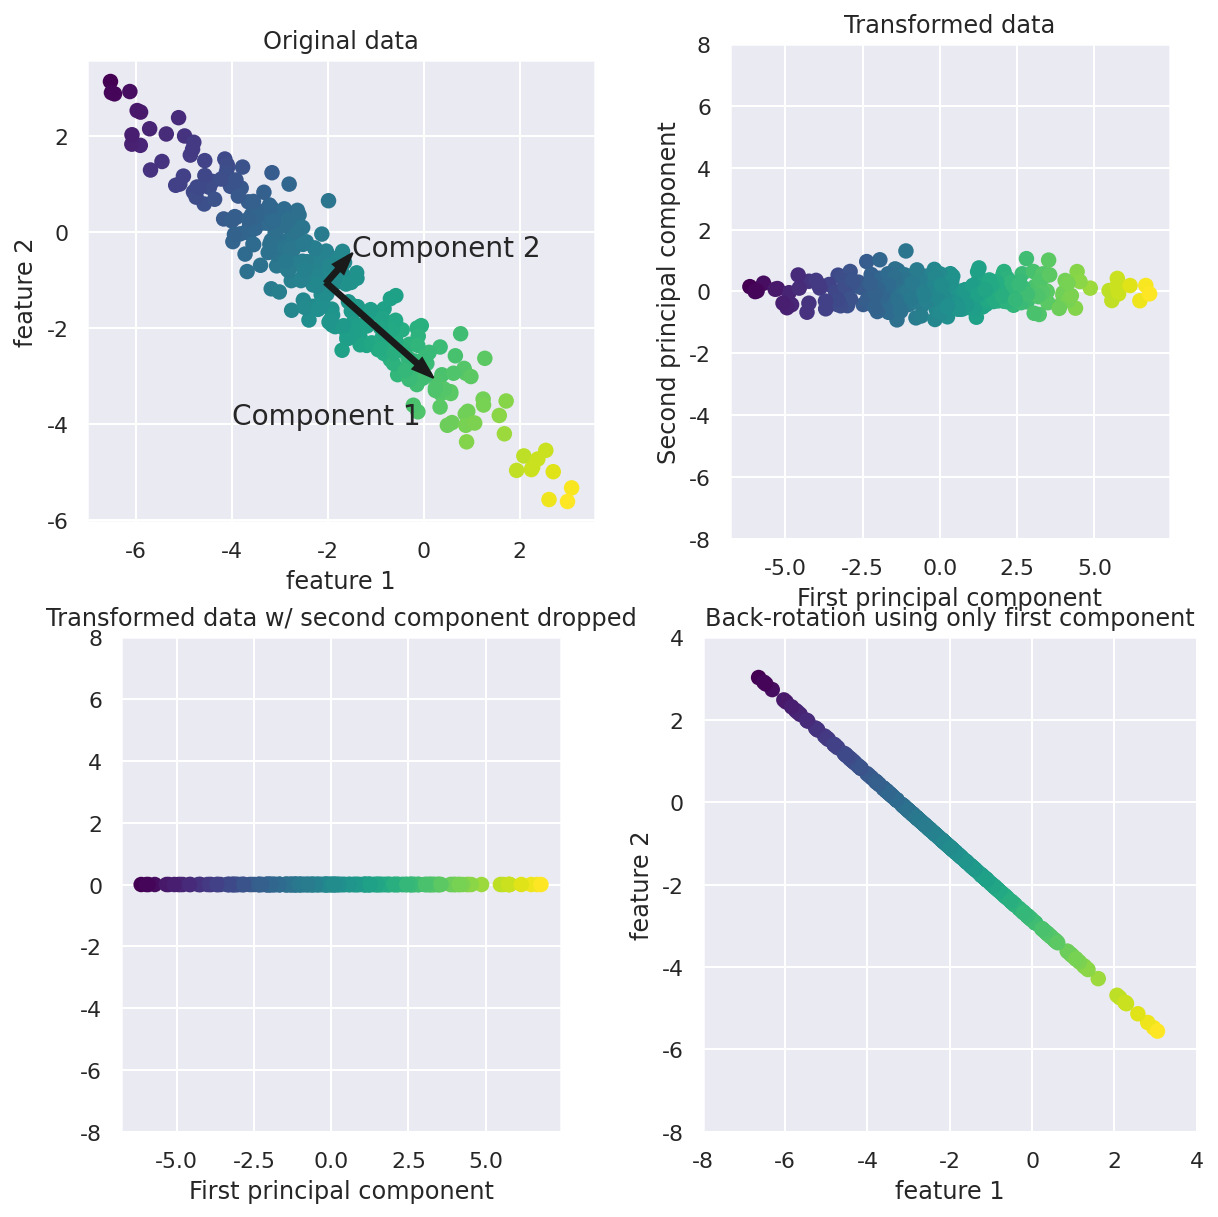

In [ ]:
mglearn.plots.plot_pca_illustration()

# base model과 비교

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=sparse_features.shape[1], random_state=SEED)
pca.fit(sparse_features)
sum(pca.explained_variance_ratio_)

0.9999999999999871

In [ ]:
tmp = pd.DataFrame(pca.transform(sparse_features))
x_train = pd.concat([features,tmp],axis=1)
print(f'after: {x_train.shape}')

after: (916, 860)


In [ ]:
model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model, x_train, y_train, cv = cv , scoring="roc_auc",n_jobs=-1)
print(f'score: {scores.mean()} / base_score: {base_score}')

score: 0.9024529425917901 / base_score: 0.8933173900916701


### 주성분 200인 경우

In [ ]:
pca200 = PCA(n_components=200, random_state=SEED)
pca200.fit(sparse_features)
# 주성분에 의해 설명되는 분산비율
sum(pca200.explained_variance_ratio_)

0.7406554142022773

In [ ]:
tmp = pd.DataFrame(pca200.transform(sparse_features)).add_prefix("pca_")
x_train = pd.concat([features,tmp], axis=1)
print(f'after: {x_train.shape}')

after: (916, 205)


In [ ]:
model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model, x_train, y_train, cv = cv, scoring="roc_auc",n_jobs=-1)
print(f'score: {scores.mean()} / base_score: {base_score}')

score: 0.883737084043265 / base_score: 0.8933173900916701


### 주성분 400인 경우

In [ ]:
pca400 = PCA(n_components=400, random_state=SEED)
pca400.fit(sparse_features)
# 주성분에 의해 설명되는 분산비율
sum(pca400.explained_variance_ratio_)

0.8454830381455509

In [ ]:
tmp = pd.DataFrame(pca400.transform(sparse_features)).add_prefix("pca_")
x_train = pd.concat([features,tmp], axis=1)
print(f'after: {x_train.shape}')

after: (916, 405)


In [ ]:
model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model, x_train, y_train, cv = cv, scoring="roc_auc", n_jobs=-1)
print(f'score: {scores.mean()} / base_score : {base_score}')

score: 0.8812506745482335 / base_score : 0.8933173900916701


839개 피처를 사용한 base_score보다 405개 피처만 사용한 PCA가 적용된 score가 성능이 좋게 나왔다.

In [ ]:
np.random.seed(121)
# 4X4 행렬 a 생성
a = np.random.randn(4, 4)
np.round(a, 3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.014,  0.63 ,  1.71 , -1.327],
       [ 0.402, -0.191,  1.404, -1.969]])

In [ ]:
from numpy.linalg import svd

U, Sigma, Vt = svd(a) #특이값 분행

print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [ ]:
#sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(f'원본: {np.round(a, 3)}')
print('-'*50)
print(f'원본: {np.round(a_, 3)}')

# Base model과 비교

truncatedSVD : sigma 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식이다.

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=SEED)
svd.fit(sparse_features)
sum(svd.explained_variance_ratio_)

0.6454006233633245

In [ ]:
tmp = pd.DataFrame(svd.transform(sparse_features))
x_train = pd.concat([features,tmp], axis=1)
print(f'after: {x_train.shape}')

after: (916, 105)


In [ ]:
model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model, x_train, y_train, cv =cv, scoring="roc_auc", n_jobs=-1)
print(f'score: {scores.mean()} / base_score: {base_score}')

score: 0.9013189021529033 / base_score: 0.8933173900916701


# 비음수 행렬 분해 (NMF)

비음수 행렬 인수분해라고 불리는 이유는 음수가 아닌 특성과 가중치를 반환하기 때문

In [ ]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=100, random_state=SEED, max_iter=500)
nmf.fit(sparse_features)

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


NMF(max_iter=500, n_components=100, random_state=42)

In [ ]:
(nmf.components_ < 0).sum(), nmf.components_.shape

(0, (100, 855))

In [ ]:
tmp = pd.DataFrame(nmf.transform(sparse_features)).add_prefix("nmf_")
x_train = pd.concat([features,tmp], axis=1)
print(f'after: {x_train.shape}')

after: (916, 105)


In [ ]:
model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model, x_train, y_train, cv= cv, scoring='roc_auc', n_jobs=-1)
print(f'score: {scores.mean()} / base_score: {base_score}')

score: 0.8874957322805482 / base_score: 0.8933173900916701
